# Telework Predictive Model 

###Supervised Learning: Classification methods


## Context and Problem

- An interesting application of Machine learning classification methods is to build predictive models. 
- In this case study, we will have a look at the CPT data of and build predictive model using Logistic regression, Support vector machine, K-nearest neighbor, decision tree and random forest methods.


## Data Information

From Replica: 
* This readme was generated for the following download:
 * Geography: Mid-Atlantic
 * Time Period: Fall 2021 Thursday
 * Applied Filter(s): {Home Location: Washington-Arlington-Alexandria, DC-VA-MD-WV}; {Work From Home: Worked in-person}; {Work From Home: Worked from home}; {Work From Home: Employed but did not work on this modeled day }; {Work From Home: Unemployed, under 16, or not in labor force}

his readme was generated for the following download:
Geography: Washington-Arlington-Alexandria, DC-VA-MD-WV
Metric: Consumer spend by home location
Metric Option: In Person and Online Spend
Geography Breakdown: county
Date: Oct 25, 2021
Days of Week: Weekday


---------------------------------------------------------------------------

Replica Trends provides a nationwide estimate of mobility and economic activities, updated weekly at a census-tract level fidelity.

Replica’s mobility and spend data are available for each week since the beginning of 2019. COVID-19 data is available since the beginning of 2020.

The geographies available in Trends match the U.S. Census definitions for States, Combined Statistical Areas, Metropolitan Statistical Areas, Micropolitan Statistical Areas, Cities, Counties, and Census Tracts. Populations are sourced from 2019 U.S. Census ACS data.

Trends estimates are based on a composite of data sources, including but not limited to road traffic, mobile location and financial transaction data. We use these to run a full activity-based model that produces disaggregate travel behaviors for the entire synthetic population for a typical weekday and weekend day each week. For spend, advanced modeling and statistical weighting methods are applied to generate a representative weekly total estimate of consumer spending activity. Together, these provide vital indicators for tracking, understanding, and comparing patterns of mobility and economic recovery across geographic regions in a high level of detail.



Data Source	Year
American Community Survey (ACS)/ Public Use Microdata Sample (PUMS)	2019
Census Transportation Planning Products (CTPP)	2016
Longitudinal Employer-Household Dynamics (LEHD)	2017

In [29]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
# Importing libraries for data manipulation
import numpy as np

import pandas as pd

# Importing libraries for data visualization
import seaborn as sns

import matplotlib.pyplot as plt

# Importing libraries for building linear regression model
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)

import random
import warnings
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [30]:
df=pd.read_csv('dc_work_pop_v3.csv')
df.head()

,household_id,person_id,BLOCKGROUP,BLOCKGROUP_work,BLOCKGROUP_school,TRACT,TRACT_work,TRACT_school,age_group,age,...,lng,lat_work,lng_work,lat_school,lng_school,office_size,wfh_rate,duration_minutes,distance_miles,straight_line_distance
0,15728940235104021911,3316061877068687258,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,25_34,28,...,-75.474821,38.902175,-77.02929,NaN,NaN,Very Large,High,145.0,119.7,7904.77
1,15919703167050744549,17594292975948953683,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,35_64,62,...,-75.474821,38.902175,-77.02929,NaN,NaN,Very Large,Very High,144.0,119.3,7904.86
2,15818539002377193926,13181141671279974396,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,35_64,50,...,-75.474821,38.902175,-77.02929,NaN,NaN,Very Large,High,151.0,118.9,7905.58
3,756590362721237002,407041940650545844,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,35_64,44,...,-75.474821,38.902175,-77.02929,NaN,NaN,Very Large,High,NaN,NaN,7905.81
4,9635518946984176983,5130761207120207342,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,35_64,59,...,-75.474821,38.902175,-77.02929,NaN,NaN,Very Large,Very High,NaN,NaN,7904.74


In [31]:
df.wfh_rate.unique()

array(['High', 'Very High', 'Low', 'Medium', 'None', 'Very Low'],
      dtype=object)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936461 entries, 0 to 936460
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   household_id             936461 non-null  uint64 
 1   person_id                936461 non-null  uint64 
 2   BLOCKGROUP               936461 non-null  int64  
 3   BLOCKGROUP_work          826449 non-null  float64
 4   BLOCKGROUP_school        196283 non-null  float64
 5   TRACT                    936461 non-null  int64  
 6   TRACT_work               826449 non-null  float64
 7   TRACT_school             196283 non-null  float64
 8   age_group                936461 non-null  object 
 9   age                      936461 non-null  int64  
 10  sex                      936461 non-null  object 
 11  race                     936461 non-null  object 
 12  ethnicity                936461 non-null  object 
 13  individual_income_group  936461 non-null  object 
 14  indi

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
household_id,936461.0,9.218823e+18,5.324540e+18,2.361216e+13,4.608564e+18,9.208965e+18,1.382882e+19,1.844674e+19
person_id,936461.0,9.459740e+18,5.286030e+18,6.777124e+11,4.910153e+18,9.746596e+18,1.398285e+19,1.844673e+19
BLOCKGROUP,936461.0,2.549217e+11,1.595124e+11,1.000104e+11,1.100101e+11,2.403170e+11,5.101310e+11,5.406597e+11
BLOCKGROUP_work,826449.0,1.276823e+11,7.614476e+10,1.000104e+11,1.100101e+11,1.100101e+11,1.100101e+11,5.403797e+11
BLOCKGROUP_school,196283.0,1.100101e+11,4.131206e+04,1.100100e+11,1.100100e+11,1.100101e+11,1.100101e+11,1.100101e+11
TRACT,936461.0,2.549217e+10,1.595124e+10,1.000104e+10,1.100101e+10,2.403170e+10,5.101310e+10,5.406597e+10
TRACT_work,826449.0,1.276823e+10,7.614476e+09,1.000104e+10,1.100101e+10,1.100101e+10,1.100101e+10,5.403797e+10
TRACT_school,196283.0,1.100101e+10,4.131202e+03,1.100100e+10,1.100100e+10,1.100101e+10,1.100101e+10,1.100101e+10
age,936461.0,3.774355e+01,1.604931e+01,3.000000e+00,2.700000e+01,3.600000e+01,5.000000e+01,9.500000e+01
individual_income,936461.0,7.543469e+04,8.949890e+04,-8.586000e+03,2.145400e+04,5.483900e+04,1.031450e+05,1.788177e+06


In [34]:
df=df.assign(Trip_cost=df['distance_miles']*0.4343184644)

In [35]:
df

,household_id,person_id,BLOCKGROUP,BLOCKGROUP_work,BLOCKGROUP_school,TRACT,TRACT_work,TRACT_school,age_group,age,...,lat_work,lng_work,lat_school,lng_school,office_size,wfh_rate,duration_minutes,distance_miles,straight_line_distance,Trip_cost
0,15728940235104021911,3316061877068687258,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,25_34,28,...,38.902175,-77.029290,NaN,NaN,Very Large,High,145.0,119.7,7904.77,51.987920
1,15919703167050744549,17594292975948953683,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,35_64,62,...,38.902175,-77.029290,NaN,NaN,Very Large,Very High,144.0,119.3,7904.86,51.814193
2,15818539002377193926,13181141671279974396,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,35_64,50,...,38.902175,-77.029290,NaN,NaN,Very Large,High,151.0,118.9,7905.58,51.640465
3,756590362721237002,407041940650545844,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,35_64,44,...,38.902175,-77.029290,NaN,NaN,Very Large,High,NaN,NaN,7905.81,NaN
4,9635518946984176983,5130761207120207342,100010410001,1.100101e+11,NaN,10001041000,1.100101e+10,NaN,35_64,59,...,38.902175,-77.029290,NaN,NaN,Very Large,Very High,NaN,NaN,7904.74,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936456,17679108331281540009,14302605538808974503,540659710003,1.100100e+11,NaN,54065971000,1.100100e+10,NaN,35_64,59,...,38.938324,-77.082780,NaN,NaN,Very Large,High,160.0,93.4,8096.05,40.565345
936457,6884929847053739029,16832645129423044310,540659710003,1.100100e+11,NaN,54065971000,1.100100e+10,NaN,35_64,61,...,38.936591,-77.075433,NaN,NaN,Large,Very High,121.0,95.1,8100.19,41.303686
936458,8995122164611777926,4876085227303859013,540659710003,1.100100e+11,NaN,54065971000,1.100100e+10,NaN,35_64,39,...,38.939892,-77.077563,NaN,NaN,Very Large,Very High,139.0,98.7,8100.32,42.867232
936459,10497883828816638753,3229274669373061382,540659710003,1.100100e+11,NaN,54065971000,1.100100e+10,NaN,18_24,24,...,38.939892,-77.077563,NaN,NaN,Very Large,Very High,NaN,NaN,8100.15,NaN


In [36]:
df=df.drop(['household_id','person_id','BLOCKGROUP', 'BLOCKGROUP_work', 'BLOCKGROUP_school','TRACT','TRACT_work','TRACT_school','school_grade_attending','industry','household_role','subfamily_number','subfamily_relationship','family_structure','building_type','resident_type','language','lat','lng','lat_work','lng_work','lat_school','lng_school'],axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936461 entries, 0 to 936460
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age_group                936461 non-null  object 
 1   age                      936461 non-null  int64  
 2   sex                      936461 non-null  object 
 3   race                     936461 non-null  object 
 4   ethnicity                936461 non-null  object 
 5   individual_income_group  936461 non-null  object 
 6   individual_income        936461 non-null  int64  
 7   employment               936461 non-null  object 
 8   education                936461 non-null  object 
 9   commute_mode             936461 non-null  object 
 10  tenure                   936461 non-null  object 
 11  migration                936461 non-null  object 
 12  household_size           936461 non-null  object 
 13  household_income_group   936461 non-null  object 
 14  hous

In [38]:
df.isnull().sum()

age_group                       0
age                             0
sex                             0
race                            0
ethnicity                       0
individual_income_group         0
individual_income               0
employment                      0
education                       0
commute_mode                    0
tenure                          0
migration                       0
household_size                  0
household_income_group          0
household_income                0
vehicles                        0
office_size                     0
wfh_rate                        0
duration_minutes           523123
distance_miles             523123
straight_line_distance          0
Trip_cost                  523123
dtype: int64

In [39]:
def Trip_distance(cols):
    distance_miles = cols[0]
    straight_line_distance = cols[1]
    if pd.isnull(distance_miles):
        return straight_line_distance
    else:
        return distance_miles

In [40]:
#Apply the function
df['distance_miles'] = df[['distance_miles','straight_line_distance']].apply(Trip_distance, axis=1)

In [41]:
print(df['distance_miles'].isna().sum()) 

0


In [42]:
df=df.assign(Trip_cost=df['distance_miles']*0.4343184644)

In [43]:
df.isnull().sum()

age_group                       0
age                             0
sex                             0
race                            0
ethnicity                       0
individual_income_group         0
individual_income               0
employment                      0
education                       0
commute_mode                    0
tenure                          0
migration                       0
household_size                  0
household_income_group          0
household_income                0
vehicles                        0
office_size                     0
wfh_rate                        0
duration_minutes           523123
distance_miles                  0
straight_line_distance          0
Trip_cost                       0
dtype: int64

- Mean  trip duration = 2.798968e+01
- Mean trip distance = 1.212585e+01
- Mean Trip duration per mile = Mean trip duration /mean trip distance= 2.31 minutes per mile 

**To substitute the missing values in the trip duration, we will multiply the distance_miles by 2.31**


In [44]:
def Trip_duration(cols):
    duration_minutes = cols[0]
    distance_miles = cols[1]
    if pd.isnull(duration_minutes):
        return distance_miles*2.31
    else:
        return duration_minutes

In [45]:
#Apply the function
df['duration_minutes'] = df[['duration_minutes','distance_miles']].apply(Trip_duration, axis=1)

In [46]:
df.isnull().sum()

age_group                  0
age                        0
sex                        0
race                       0
ethnicity                  0
individual_income_group    0
individual_income          0
employment                 0
education                  0
commute_mode               0
tenure                     0
migration                  0
household_size             0
household_income_group     0
household_income           0
vehicles                   0
office_size                0
wfh_rate                   0
duration_minutes           0
distance_miles             0
straight_line_distance     0
Trip_cost                  0
dtype: int64

## Done with replacing the missing values  

# Some information about the data 
This file contains data for all members of the synthetic population for the Mid-Atlantic region for the Fall 2021 season with office locations in the District of Columbia. The table includes two columns that provide information about the size of the person's workplace and the share of workers at that workplace who were modeled as WFH.

1) office_size:
	Very Small: < 10 people
	Small: 10-24 people
	Medium: 24-49 people
	Large: 50-99 people
	Very Large: >= 100 people

2) wfh_rate:
	None: 0 recorded WFH activities
	Very Low: < 7.5% employees who WFH on the modeled day
	Low: 7.5% - 12.49%
	Medium: 12.5% - 14.99%
	High: 15% - 24.99%
	Very High: >= 25%

These ranges were determined by reviewing the decile distribution of workplace size and WFH proportion, respectively. The ranges can be customized on request.

In [47]:
df.wfh_rate.unique()

array(['High', 'Very High', 'Low', 'Medium', 'None', 'Very Low'],
      dtype=object)

In [48]:
df['wfh_rate'].mask(df['wfh_rate'] == 'Medium', 'No', inplace=True)
df['wfh_rate'].mask(df['wfh_rate'] == 'Low', 'No', inplace=True)
df['wfh_rate'].mask(df['wfh_rate'] == 'Very Low', 'No', inplace=True)
df['wfh_rate'].mask(df['wfh_rate'] == 'High', 'Yes', inplace=True)
df['wfh_rate'].mask(df['wfh_rate'] == 'Very High', 'Yes', inplace=True)

In [49]:
df.wfh_rate.unique()

array(['Yes', 'No', 'None'], dtype=object)

In [50]:
df.drop(df.index[df['wfh_rate'] == 'None'], inplace = True)


In [51]:
df.wfh_rate.unique()

array(['Yes', 'No'], dtype=object)

In [52]:
df.isnull().sum()

age_group                  0
age                        0
sex                        0
race                       0
ethnicity                  0
individual_income_group    0
individual_income          0
employment                 0
education                  0
commute_mode               0
tenure                     0
migration                  0
household_size             0
household_income_group     0
household_income           0
vehicles                   0
office_size                0
wfh_rate                   0
duration_minutes           0
distance_miles             0
straight_line_distance     0
Trip_cost                  0
dtype: int64

In [53]:
df['TW']=df['wfh_rate']
df = df.drop(['wfh_rate','straight_line_distance','household_income','individual_income','individual_income_group','age_group'], axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914921 entries, 0 to 936460
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     914921 non-null  int64  
 1   sex                     914921 non-null  object 
 2   race                    914921 non-null  object 
 3   ethnicity               914921 non-null  object 
 4   employment              914921 non-null  object 
 5   education               914921 non-null  object 
 6   commute_mode            914921 non-null  object 
 7   tenure                  914921 non-null  object 
 8   migration               914921 non-null  object 
 9   household_size          914921 non-null  object 
 10  household_income_group  914921 non-null  object 
 11  vehicles                914921 non-null  object 
 12  office_size             914921 non-null  object 
 13  duration_minutes        914921 non-null  float64
 14  distance_miles      

<AxesSubplot:xlabel='TW', ylabel='count'>

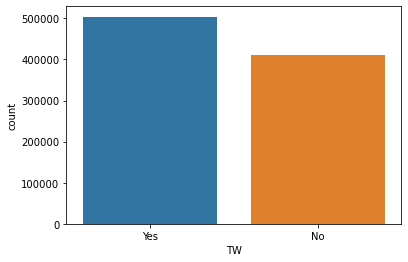

In [54]:
sns.countplot(x='TW',data=df)


In [55]:
df.TW.value_counts()

Yes    504049
No     410872
Name: TW, dtype: int64

## **Exploratory Data Analysis and Data Preprocessing**

In [56]:
# Creating numerical columns
num_cols=['age','duration_minutes', 'distance_miles','Trip_cost']

# Creating categorical variables 
cat_cols= ['office_size', 'vehicles','household_income_group','household_size','migration','tenure','commute_mode','education','employment','ethnicity','race','sex']

dict_TW = {'Yes': 1, 'No': 0}


df['TW'] = df.TW.map(dict_TW)



## Univariate Analysis 

In [57]:
print('The count of each category\n',df.commute_mode.value_counts())

The count of each category
 driving             354319
transit             284491
not_working         107995
carpool              69274
walking              53571
worked_from_home     26547
biking               18724
Name: commute_mode, dtype: int64


In [58]:
print('The count of each category\n',df.sex.value_counts())

The count of each category
 M    459122
F    455799
Name: sex, dtype: int64


In [59]:
print('The count of each category\n',df.race.value_counts())

The count of each category
 white                            451941
black_african_american           294583
asian                             76307
other_race_alone                  56774
two_or_more_races                 32104
american_indian_alaska_native      2655
hawaiian_pacific                    557
Name: race, dtype: int64


In [60]:
print('The count of each category\n',df.ethnicity.value_counts())

The count of each category
 not_hispanic_or_latino    779206
hispanic_or_latino        135715
Name: ethnicity, dtype: int64


In [61]:
print('The count of each category\n',df.employment.value_counts())

The count of each category
 employed      814718
under_16       68677
notinlf        26567
unemployed      4959
Name: employment, dtype: int64


In [62]:
print('The count of each category\n',df.education.value_counts())

The count of each category
 advanced_degree     260634
bachelors_degree    236157
some_college        169583
high_school         116683
k_12                113122
no_school            18742
Name: education, dtype: int64


In [63]:
print('The count of each category\n',df.tenure.value_counts())

The count of each category
 owner     498476
renter    393631
GQ         22814
Name: tenure, dtype: int64


In [64]:
print('The count of each category\n',df.migration.value_counts())

The count of each category
 same_house    736867
within_us     164783
outside_us     13271
Name: migration, dtype: int64


In [65]:
print('The count of each category\n',df.household_size.value_counts())

The count of each category
 2_person                   246552
3_person                   164898
4_person                   155103
1_person                   138479
5_person                    79373
7_plus_person               64671
6_person                    43031
1_person_group_quarters     22814
Name: household_size, dtype: int64


In [66]:
print('The count of each category\n',df.household_income_group.value_counts())

The count of each category
 125000_plus     473608
75000_125000    194976
40000_75000     131768
10000_40000      75313
lte_10000        39256
Name: household_income_group, dtype: int64


### **Univariate analysis of numerical columns**



In [67]:
# Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,914921.0,38.016078,15.876235,3.0,27.000000,36.000000,50.000000,95.000000
duration_minutes,914921.0,10317.384453,9179.920866,0.0,26.000000,18479.445600,18507.789300,18798.664500
distance_miles,914921.0,4466.406717,3973.991719,0.0,8.800000,7999.760000,8012.030000,8137.950000
Trip_cost,914921.0,1939.842907,1725.977981,0.0,3.822002,3474.443479,3479.772566,3534.461947


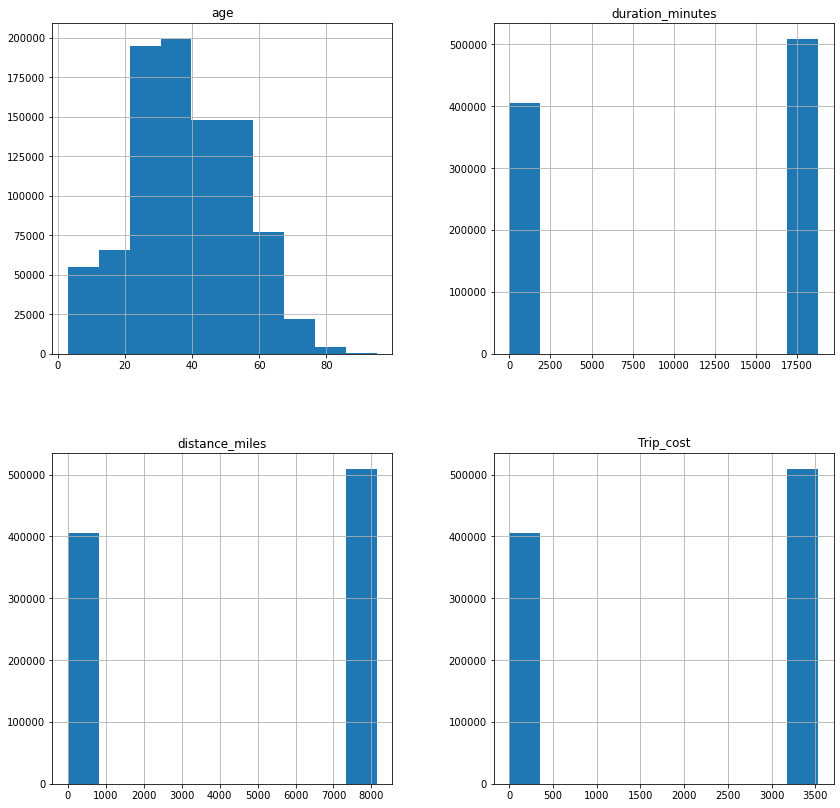

In [68]:
# Creating histograms
df[num_cols].hist(figsize=(14,14))
plt.show()

### **Univariate analysis for categorical variables**

In [69]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

Very Large    0.739357
Large         0.140070
Medium        0.070661
Small         0.040377
Very Small    0.009535
Name: office_size, dtype: float64
****************************************
2         0.322585
1         0.312247
3_plus    0.206959
zero      0.133274
GQ        0.024935
Name: vehicles, dtype: float64
****************************************
125000_plus     0.517649
75000_125000    0.213107
40000_75000     0.144021
10000_40000     0.082316
lte_10000       0.042906
Name: household_income_group, dtype: float64
****************************************
2_person                   0.269479
3_person                   0.180232
4_person                   0.169526
1_person                   0.151356
5_person                   0.086754
7_plus_person              0.070685
6_person                   0.047032
1_person_group_quarters    0.024935
Name: household_size, dtype: float64
****************************************
same_house    0.805389
within_us     0.180106
outside_us    0.0145

### **Bivariate and Multivariate analysis**
We have analyzed different categorical and numerical variables. Let's now check how does attrition rate is related with other categorical variables.

<AxesSubplot:xlabel='TW'>

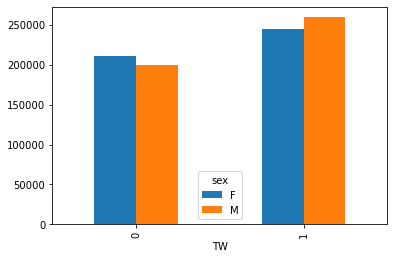

In [70]:
ax1 = df.groupby(["TW"])["sex"].value_counts().unstack().round(3)
#count plot
ax1.plot(kind="bar")


<AxesSubplot:xlabel='TW'>

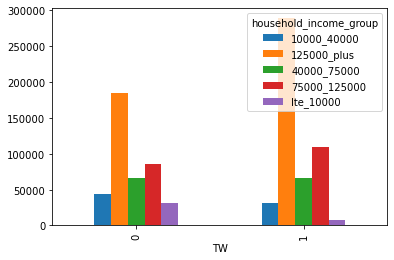

In [71]:
ax1 = df.groupby(["TW"])["household_income_group"].value_counts().unstack().round(3)
#count plot
ax1.plot(kind="bar")


<AxesSubplot:xlabel='TW'>

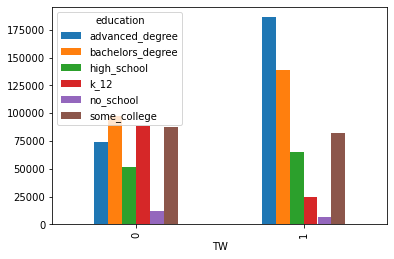

In [72]:
ax1 = df.groupby(["TW"])["education"].value_counts().unstack().round(3)
#count plot
ax1.plot(kind="bar")


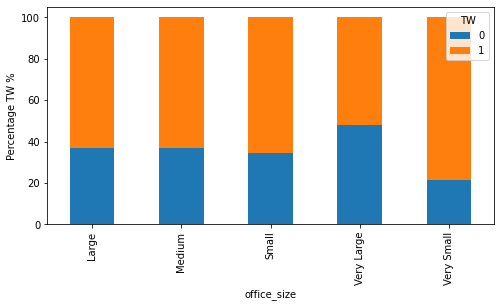

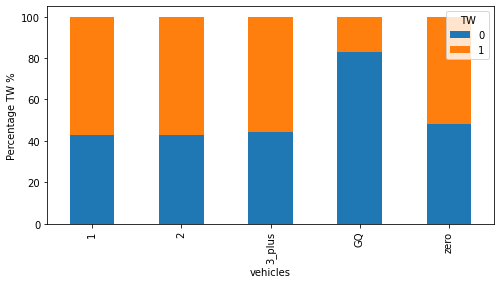

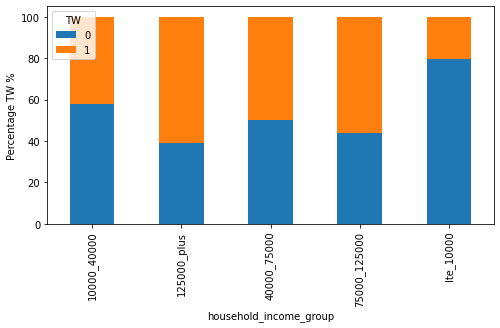

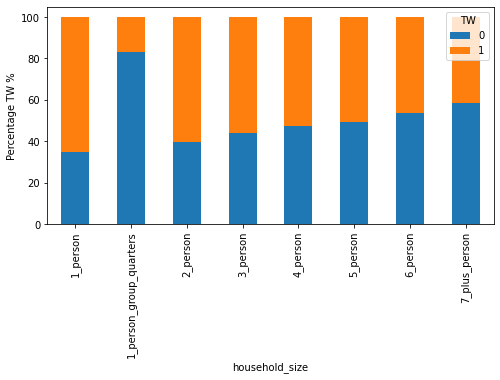

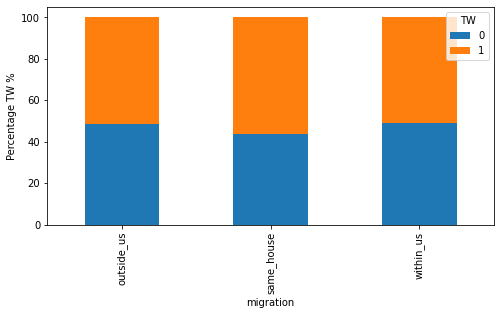

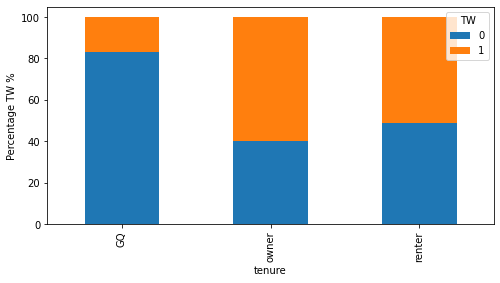

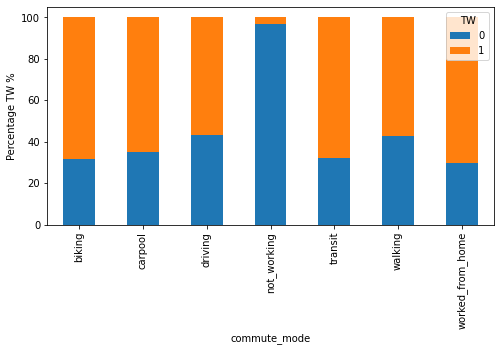

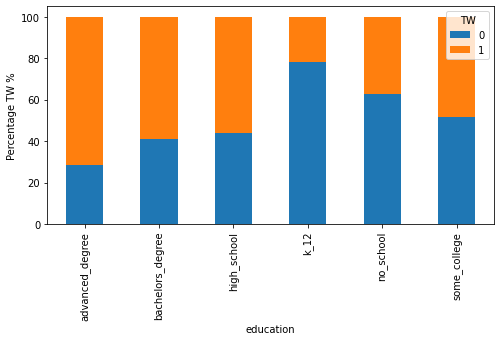

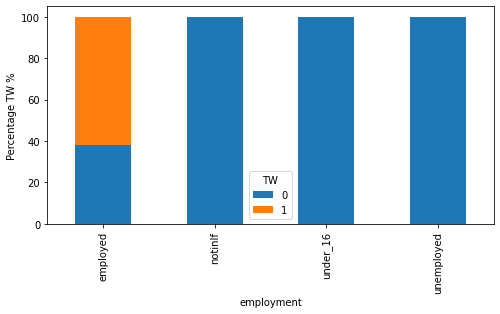

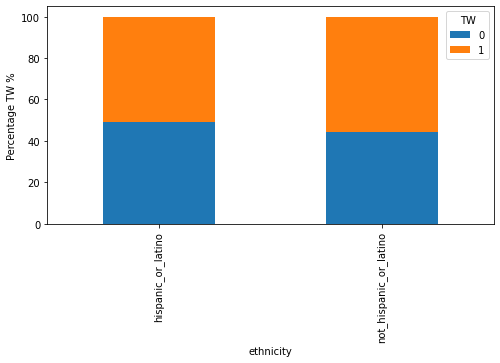

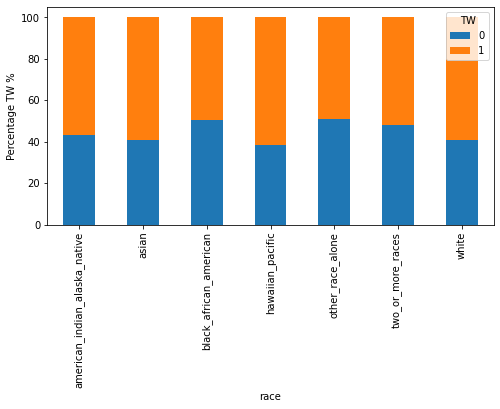

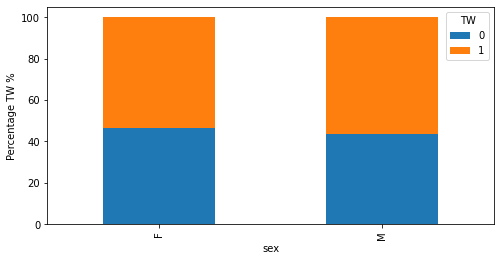

In [73]:
for i in cat_cols:
    if i!='TW':
        (pd.crosstab(df[i],df['TW'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage TW %')

In [74]:
# Mean of numerical variables grouped by attrition
df.groupby(['TW'])[num_cols].mean()

,age,duration_minutes,distance_miles,Trip_cost
TW,,,,
0,31.926561,11315.145954,4898.164515,2127.363291
1,42.979905,9504.066177,4114.462381,1786.986983



### **Let's check the relationship between different numerical variables**

<AxesSubplot:>

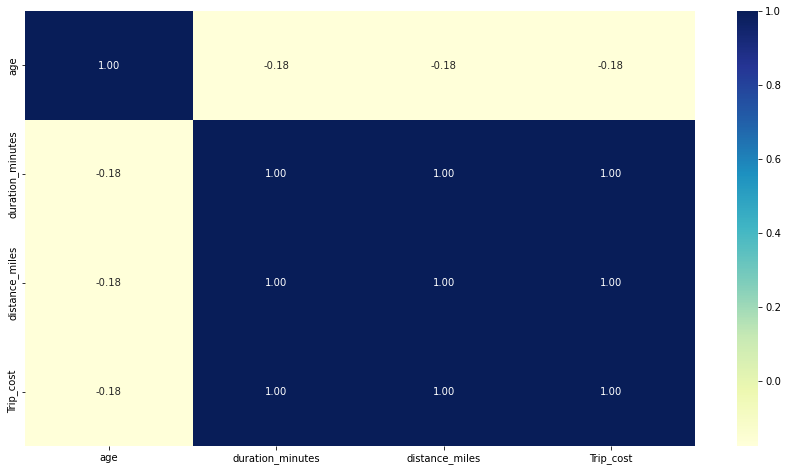

In [75]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

## **Model Building - Approach**

1. Data preparation.
2. Partition the data into a train and test set.
3. Build a model on the train data.
4. Tune the model if required.
5. Test the data on the test set.

### **Data preparation**

**Creating dummy variables for categorical Variables**

In [76]:
# Creating list of dummy columns
to_get_dummies_for = ['office_size', 'vehicles','household_income_group','household_size','migration','tenure','commute_mode','education','employment','ethnicity','race','sex']
# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)      
     


**Separating the independent variables (X) and the dependent variable (Y)**

In [77]:
# Separating target variable and other variables

Y= df.TW
X= df.drop(columns = ['TW'])

**Splitting the data into 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [78]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

### **Scaling the data**

The independent variables in this dataset have different scales. When features have different scales from each other, there is a chance that a higher weightage will be given to features that have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature. 

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

Tree based models such as **Decision Trees** and **Random Forest** does not require feature scaling to be performed as they are not sensitive to the variance in the data.

We will scale the data for **Logistic Regression** and **SVM**.  We will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score. It standardizes features by subtracting the mean and scaling it to have unit variance. The standard score of sample x is calculated as:

> **z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

In [79]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**

1. Predicting a person will telework when the person doesn't telework. (False positive, the higher the precision the higher the chance of minimizing the false positive)
2. Predicting a person will not telework when the person actually telework. ( False negative, The higher the recall the higher chance of minimizing the false negative)



**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [80]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Do Not Telework', 'Telework'], yticklabels=['Do Not Telework', 'Telework'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the model**

We will be building 6 different models:

- **Logistic Regression**
- **Support Vector Machine(SVM)**
- **Decision Tree**
- **Random Forest**
- **K-nearest neigbor**
- **Multinomial logit**


### **Logistic Regression Model**

In [81]:
# Fitting logistic regression model

lg=LogisticRegression()
lg.fit(X_train_scaled,y_train)

LogisticRegression()

**Let's check the model performance**

              precision    recall  f1-score   support

           0       0.77      0.47      0.58    287610
           1       0.67      0.89      0.76    352834

    accuracy                           0.70    640444
   macro avg       0.72      0.68      0.67    640444
weighted avg       0.72      0.70      0.68    640444



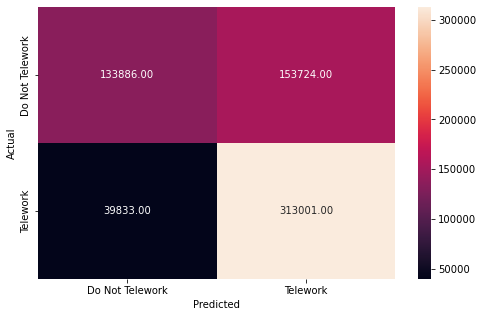

In [82]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train_scaled)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.77      0.46      0.58    123262
           1       0.67      0.89      0.76    151215

    accuracy                           0.70    274477
   macro avg       0.72      0.68      0.67    274477
weighted avg       0.72      0.70      0.68    274477



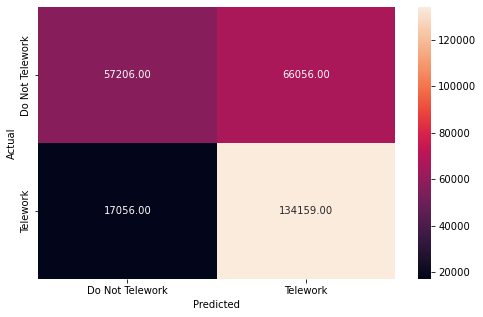

In [83]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

In [84]:
# Fitting logistic regression model

lg1=LogisticRegression(class_weight='balanced')
lg1.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced')

              precision    recall  f1-score   support

           0       0.69      0.56      0.62    287610
           1       0.69      0.79      0.74    352834

    accuracy                           0.69    640444
   macro avg       0.69      0.68      0.68    640444
weighted avg       0.69      0.69      0.69    640444



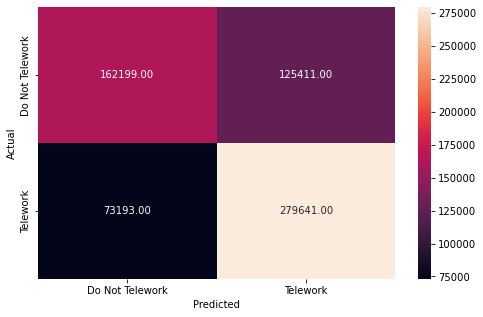

In [85]:
# Checking the performance on the training data
y_pred_train = lg1.predict(X_train_scaled)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.69      0.56      0.62    123262
           1       0.69      0.79      0.74    151215

    accuracy                           0.69    274477
   macro avg       0.69      0.68      0.68    274477
weighted avg       0.69      0.69      0.68    274477



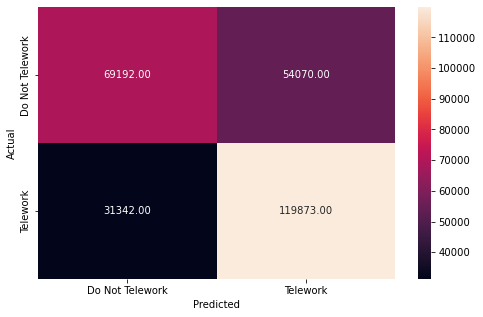

In [86]:
# Checking the performance on the test dataset
y_pred_test = lg1.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

### **Precision-Recall Curve for logistic regression**

**Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.**

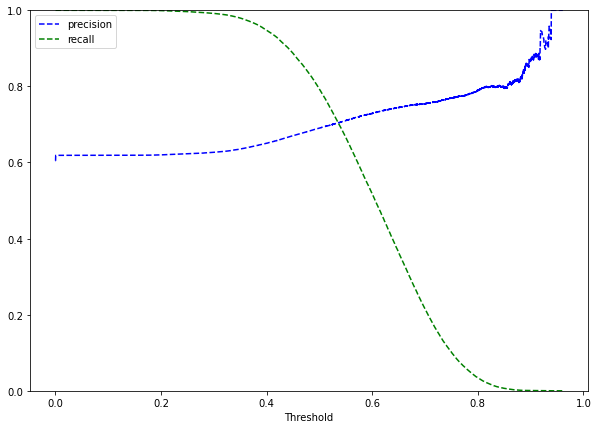

In [87]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg1.predict_proba(X_train_scaled)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation:**
- We can see that precision and recall are balanced for a threshold of about ~**0.55**.

**Let's find out the performance of the model at this threshold**

              precision    recall  f1-score   support

           0       0.77      0.46      0.58    287610
           1       0.67      0.89      0.76    352834

    accuracy                           0.70    640444
   macro avg       0.72      0.68      0.67    640444
weighted avg       0.72      0.70      0.68    640444



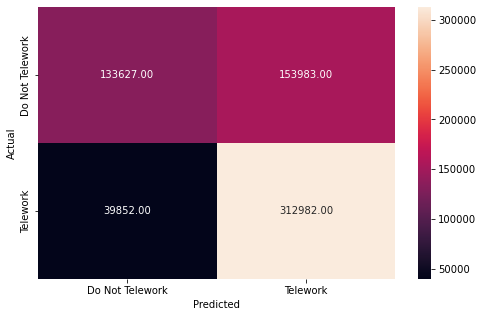

In [88]:
optimal_threshold=.45
y_pred_train = lg1.predict_proba(X_train_scaled)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

              precision    recall  f1-score   support

           0       0.77      0.46      0.58    123262
           1       0.67      0.89      0.76    151215

    accuracy                           0.70    274477
   macro avg       0.72      0.68      0.67    274477
weighted avg       0.71      0.70      0.68    274477



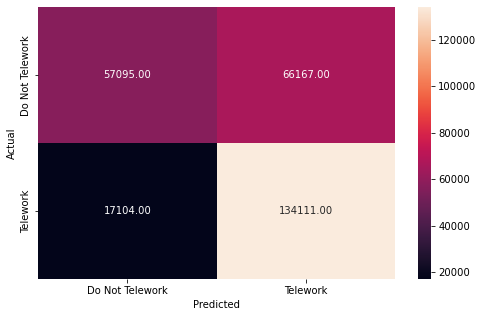

In [89]:
optimal_threshold=.45
y_pred_test = lg1.predict_proba(X_test_scaled)

metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

**Observation:**
- The model is giving **similar performance on the test and train data** i.e. the model is giving a generalized performance.
- **The recall of the test data has increased significantly** while at the same time, the precision has decreased, which is to be expected while adjusting the threshold.
- The average recall and precision for the model are good but let's see if we can get better performance using other algorithms. 

### **Decision Tree**

* We will build our model using the **DecisionTreeClassifier function.** 
* If the frequency of class A is 85% and the frequency of class B is 15%, then class B will become the dominant class and **the decision tree will become biased toward the dominant class.**
* **class_weight is a hyperparameter** for the decision tree classifier, and in this case, we can pass a dictionary {0:0.85, 1:0.15} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [90]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.6, 1: 0.4}, random_state = 1)

In [91]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.6, 1: 0.4}, random_state=1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    287610
           1       1.00      1.00      1.00    352834

    accuracy                           1.00    640444
   macro avg       1.00      1.00      1.00    640444
weighted avg       1.00      1.00      1.00    640444



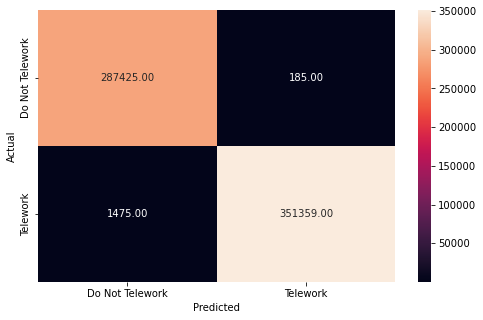

In [92]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.65      0.65      0.65    123262
           1       0.71      0.71      0.71    151215

    accuracy                           0.68    274477
   macro avg       0.68      0.68      0.68    274477
weighted avg       0.68      0.68      0.68    274477



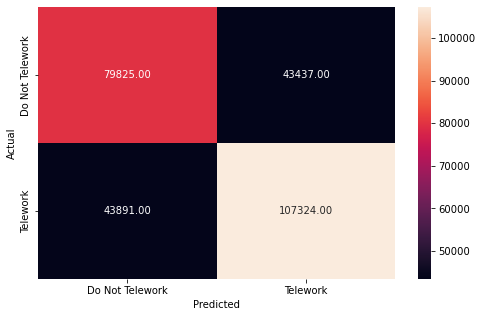

In [93]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Let's plot the feature importance and check the most important features.**

[0.150953   0.15444928 0.1304558  0.13042224 0.00745785 0.00586855
 0.01839711 0.0028551  0.01413561 0.00955695 0.00023433 0.00851498
 0.00775308 0.00587009 0.00710066 0.00182676 0.00019185 0.01526582
 0.01286199 0.01092989 0.00839307 0.00561958 0.00492009 0.0090906
 0.00839153 0.00817036 0.00877247 0.00376896 0.0103442  0.12415202
 0.00625655 0.00275619 0.0021122  0.01427715 0.00790805 0.00440733
 0.00160423 0.01976335 0.00015594 0.         0.0001649  0.00896594
 0.00636877 0.00772774 0.00016208 0.00325645 0.00403309 0.00919757
 0.01415865]


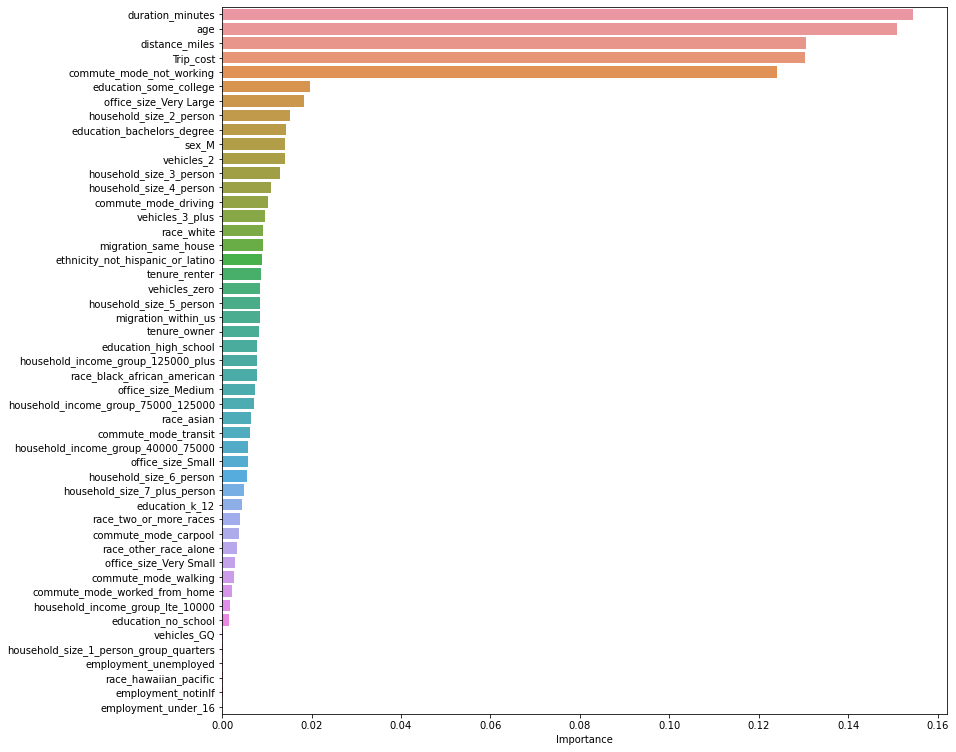

In [101]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)
print(importances)


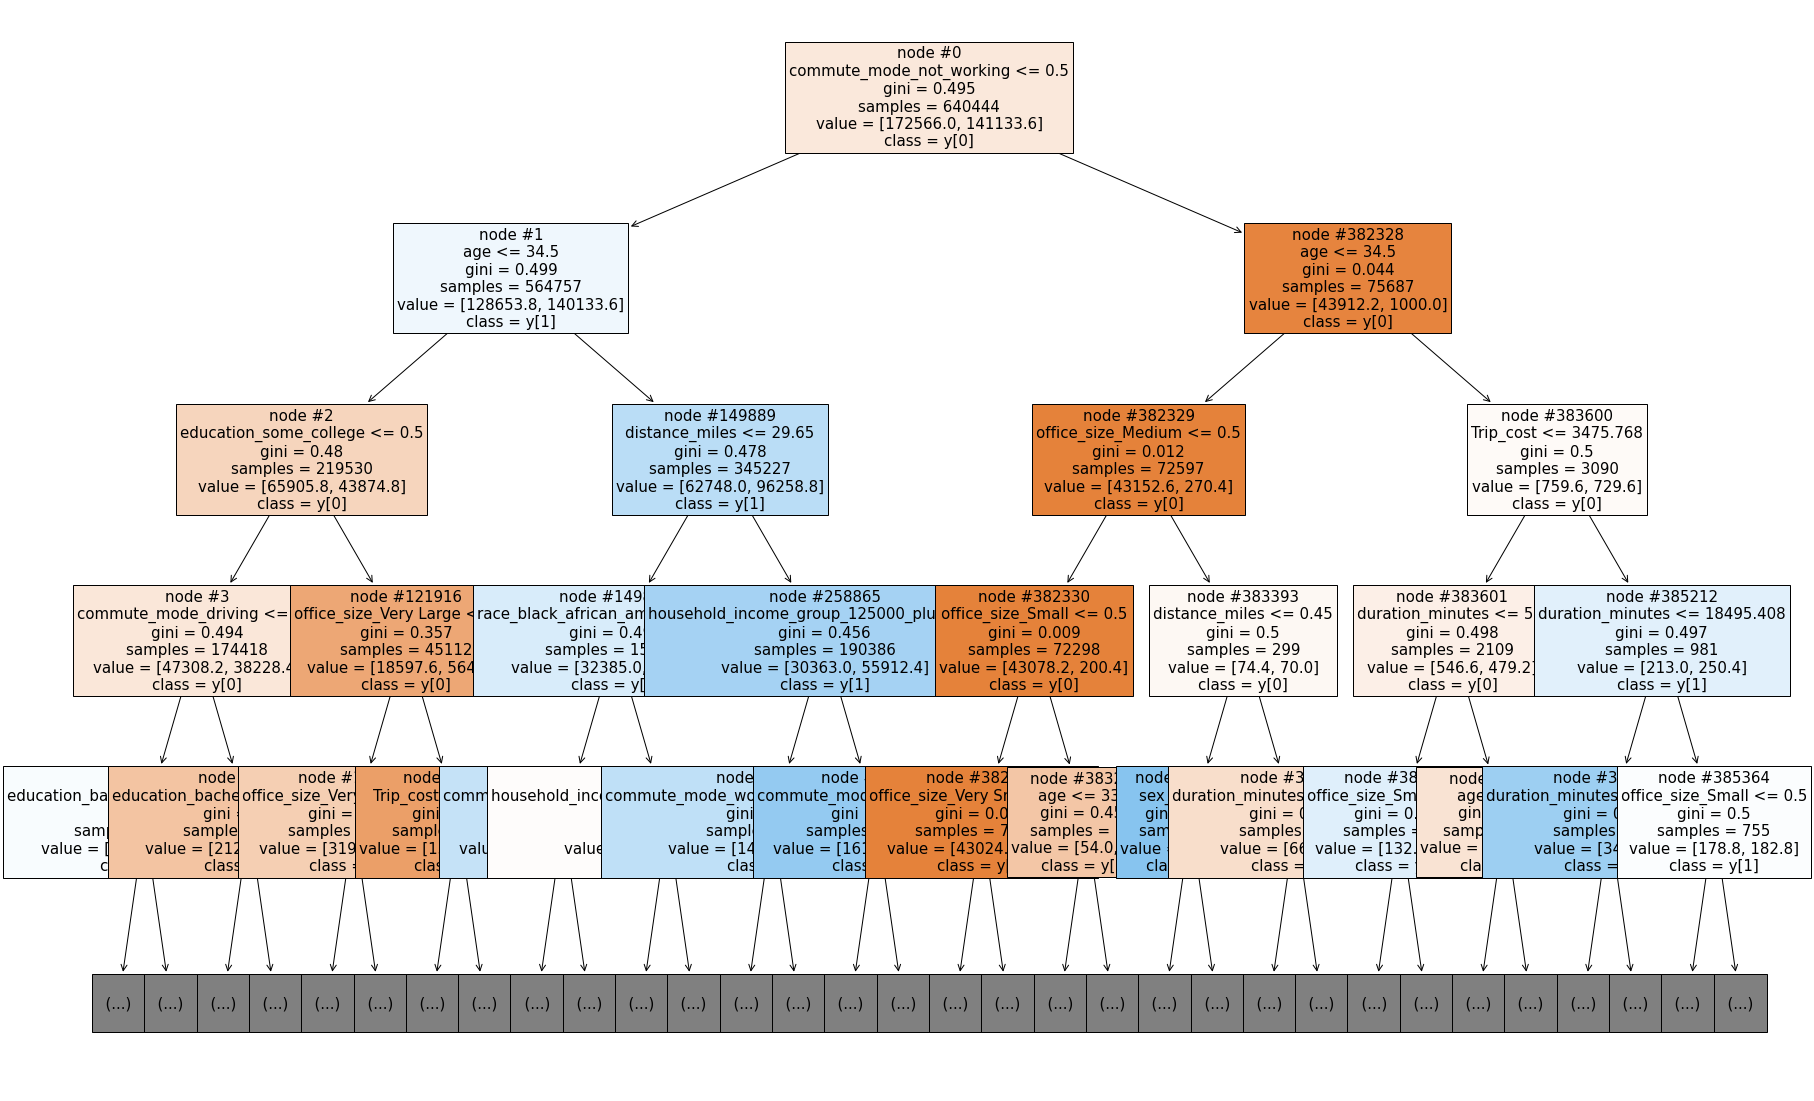

In [95]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 15, node_ids = True, class_names = True)

plt.show()

### **Note:**

Blue leaves represent the teleworker, i.e., **y[1]** and the orange leaves represent the non-teleworkers, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

### **Random Forest**

- **Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample, a decision tree makes a prediction. 
- The results from all the **decision trees** are combined and the final prediction is made using **voting** (for classification problems) or **averaging** (for regression problems).**

In [96]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.6, 1: 0.4}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.6, 1: 0.4}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    287610
           1       1.00      1.00      1.00    352834

    accuracy                           1.00    640444
   macro avg       1.00      1.00      1.00    640444
weighted avg       1.00      1.00      1.00    640444



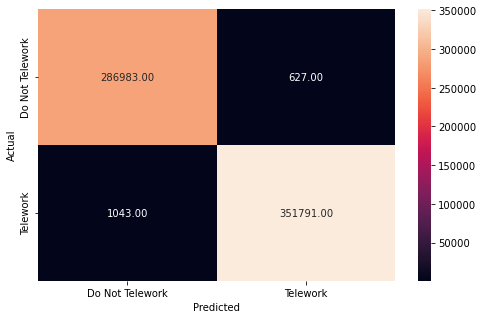

In [97]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.74      0.63      0.68    123262
           1       0.73      0.82      0.77    151215

    accuracy                           0.73    274477
   macro avg       0.74      0.72      0.73    274477
weighted avg       0.74      0.73      0.73    274477



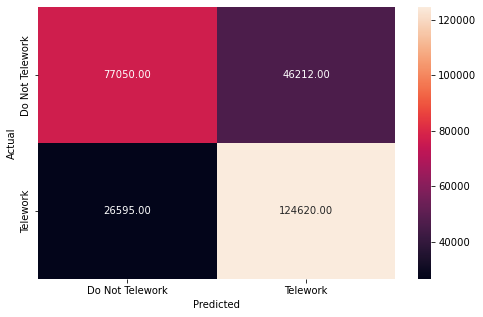

In [98]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Let's check the feature importance of the Random Forest**

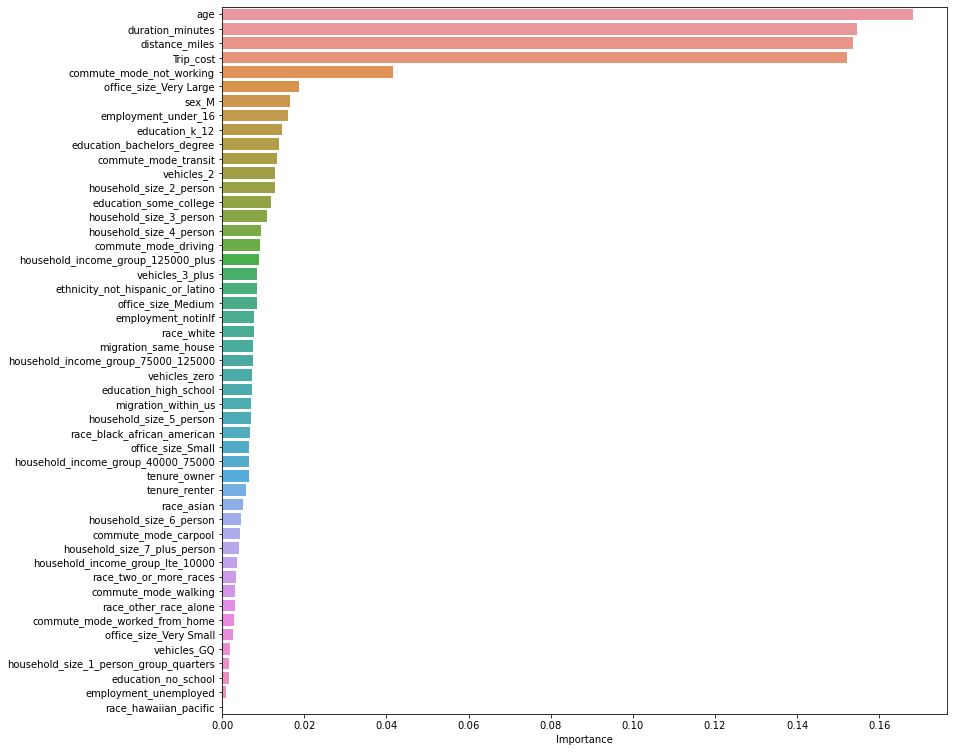

                                        Importance
age                                       0.168201
duration_minutes                          0.154610
distance_miles                            0.153692
Trip_cost                                 0.152173
commute_mode_not_working                  0.041521
office_size_Very Large                    0.018616
sex_M                                     0.016511
employment_under_16                       0.016126
education_k_12                            0.014610
education_bachelors_degree                0.013820
commute_mode_transit                      0.013367
vehicles_2                                0.012999
household_size_2_person                   0.012772
education_some_college                    0.011924
household_size_3_person                   0.011016
household_size_4_person                   0.009486
commute_mode_driving                      0.009133
household_income_group_125000_plus        0.008904
vehicles_3_plus                

In [103]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)
plt.show()

print(importance_df)

## **The k-Nearest Neighbors Model**


#### **After Scaling and PCA**


              precision    recall  f1-score   support

           0       0.82      0.73      0.77    287610
           1       0.80      0.87      0.83    352834

    accuracy                           0.81    640444
   macro avg       0.81      0.80      0.80    640444
weighted avg       0.81      0.81      0.81    640444



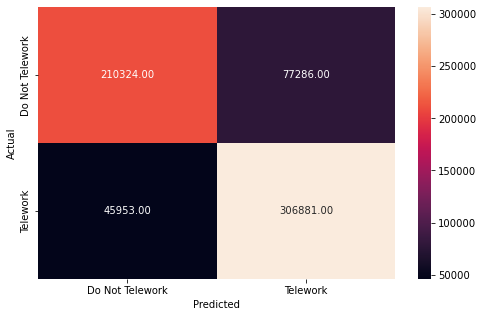

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
knn_model= KNeighborsClassifier()
knn_model.fit(X_train_pca,y_train)
knn_train_predictions = knn_model.predict(X_train_pca)
metrics_score(y_train,knn_train_predictions)

              precision    recall  f1-score   support

           0       0.68      0.59      0.63    123262
           1       0.70      0.77      0.73    151215

    accuracy                           0.69    274477
   macro avg       0.69      0.68      0.68    274477
weighted avg       0.69      0.69      0.69    274477



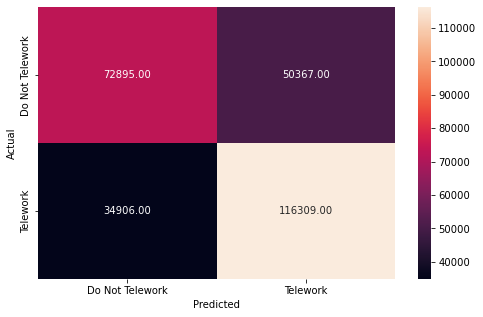

In [73]:
y_test_pred_knn = knn_model.predict(X_test_pca);
metrics_score(y_test, y_test_pred_knn)

# Multinomial Logit 


In [74]:
#Use statsmodels to assess variables
import statsmodels.api as sm

logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit_regularized()


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5604140796069098
            Iterations: 320
            Function evaluations: 332
            Gradient evaluations: 320


In [75]:
stats1=result.summary()

print(stats1)


                          MNLogit Regression Results                          
Dep. Variable:                     TW   No. Observations:               640444
Model:                        MNLogit   Df Residuals:                   640394
Method:                           MLE   Df Model:                           49
Date:                Mon, 06 Feb 2023   Pseudo R-squ.:                  0.1854
Time:                        17:32:51   Log-Likelihood:            -3.5891e+05
converged:                       True   LL-Null:                   -4.4059e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  TW=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2681   2.75e+05  -9.75e-07      1.000   -5.39e+05    5.39e+05
age                                        0.02

In [76]:
stats2=result.summary2()
print(stats2)

                                          Results: MNLogit
Model:                          MNLogit                     Pseudo R-squared:            0.185      
Dependent Variable:             TW                          AIC:                         717927.6696
Date:                           2023-02-06 17:32            BIC:                         718496.1654
No. Observations:               640444                      Log-Likelihood:              -3.5891e+05
Df Model:                       49                          LL-Null:                     -4.4059e+05
Df Residuals:                   640394                      LLR p-value:                 0.0000     
Converged:                      1.0000                      Scale:                       1.0000     
No. Iterations:                 320.0000                                                            
----------------------------------------------------------------------------------------------------
                TW = 0          

## ** Hyperparameter Tuning**


In [77]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.6, 1: 0.4}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.6, 1: 0.4}, max_depth=4,
                       min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.68      0.56      0.61    287610
           1       0.69      0.79      0.73    352834

    accuracy                           0.68    640444
   macro avg       0.68      0.67      0.67    640444
weighted avg       0.68      0.68      0.68    640444



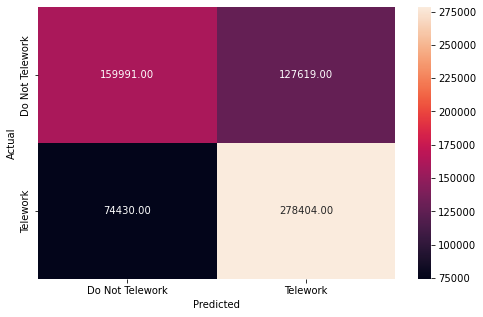

In [78]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.68      0.55      0.61    123262
           1       0.68      0.79      0.73    151215

    accuracy                           0.68    274477
   macro avg       0.68      0.67      0.67    274477
weighted avg       0.68      0.68      0.68    274477



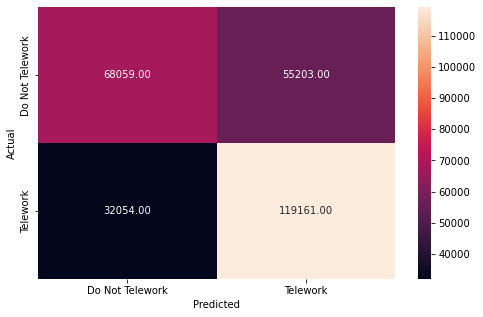

In [79]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

<AxesSubplot:xlabel='Importance'>

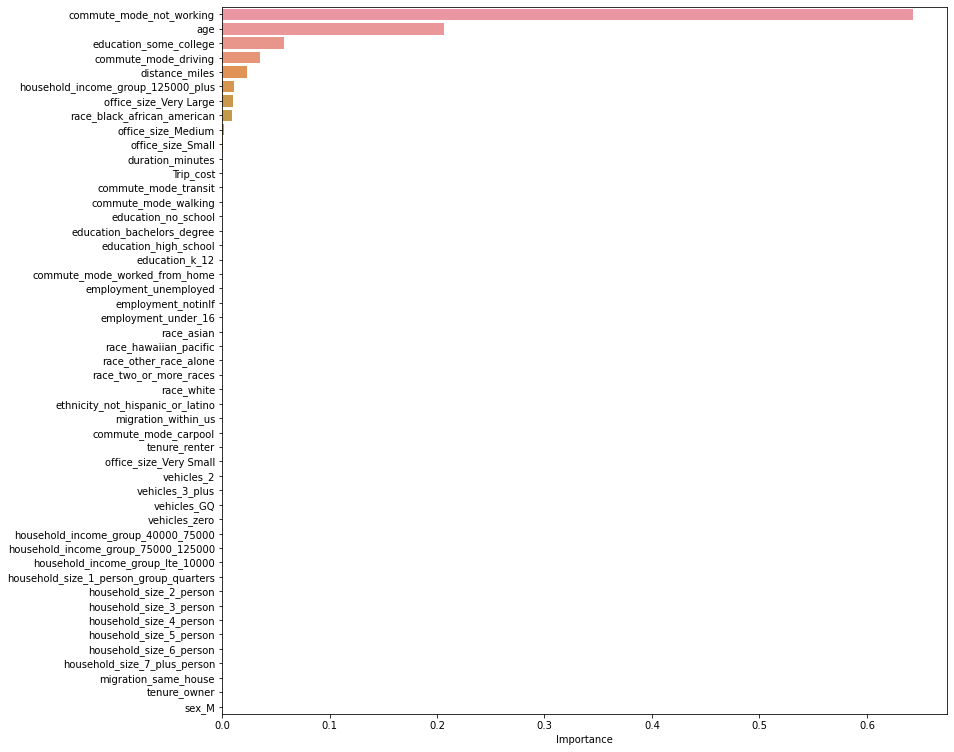

In [80]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

#### **Random Forest**

**Here are some of the parameters,**

**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node.

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

In [1]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.6, 1: 0.4}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
rf_estimator_tuned.fit(X_train, y_train)

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)
gtiju
metrics_score(y_train, y_pred_train_rf_tuned)

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [ ]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

### **Support Vector Machines**
Let's build the models using the two of the widely used kernel functions:

1.   **Linear Kernel**
2.   **RBF Kernel**

#### **Linear Kernel**

In [ ]:
# Fitting SVM
svm = SVC(kernel='linear') # Linear kernal or linear decision boundary
model = svm.fit(X= X_train_scaled, y = y_train)

In [ ]:
y_pred_train_svm = model.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_svm)

In [ ]:
# Checking performance on the test data
y_pred_test_svm = model.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_svm)

#### **RBF Kernel**


In [ ]:
svm_rbf=SVC(kernel='rbf',probability=True)
# Fit the model
svm_rbf.fit(X_train_scaled,y_train)
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [ ]:
optimal_threshold_svm=.14
y_pred_train = svm_rbf.predict_proba(X_train_scaled)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold_svm)

In [ ]:
optimal_threshold_svm=.14
y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)